In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_excel("C:\\Users\\oem\\datasets\\iris-dataset.xlsx", header = 0)

df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
data = np.array(df, dtype=np.float32)

x_data = data[:, 0:-1]  

y_data = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

In [37]:
import xgboost as xgb
from sklearn import metrics

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification (다중분류)
    'num_class': 3,  # Number of classes in the target variable 
    'max_depth': 3,  # Maximum depth of a tree
    'eta': 0.1,  # Learning rate
    'lambda': 1.0,  # L2 regularization
    'gamma': 0.1,  # regularization for tree node splitting
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_train_pred = xgb_model.predict(dtrain)
y_test_pred = xgb_model.predict(dtest)

train_acc = metrics.accuracy_score(y_train_pred, y_train)
test_acc = metrics.accuracy_score(y_test_pred, y_test)

print(f'Train Accuracy: {train_acc:.3f}')
print(f'Test Accuracy: {test_acc:.3f}')

Train Accuracy: 1.000
Test Accuracy: 0.967


In [38]:
for p, y in zip(y_test, y_test_pred):
    print("[{}] Test: {} Prediction Y: {}".format(p == int(y), p, int(y))) 

[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [2.] Prediction Y: 2
[[ True]] Test: [0.] Prediction Y: 0
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [1.] Prediction Y: 1
[[ True]] Test: [1.] Prediction Y: 1
[

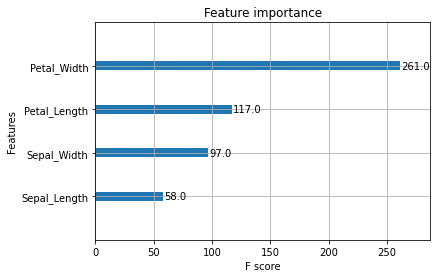

In [39]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

feature_names = df.columns[0:4]
feature_names
ax = xgb.plot_importance(xgb_model)
ax.set_yticklabels(feature_names)
plt.show()